In [ ]:
# Name - SAWAN KUMAR
# E-Mail ID - sawankumar19062001@gmail.com
# Contact Number - 8882022191
# Course - Data Science with Generative AI
# Module - 14 (Milestone 3 (Machine Learning))
# Assignment or Project - Cryptocurrency Volatility Prediction Problem Statement

#1. **Data Collection**
>* Use the provided dataset (download from the Google Drive link).
>* Load the data using Python (Pandas):

In [1]:
import pandas as pd

data = pd.read_csv("cryptocurrency_data.csv")
print(data.head())


   Unnamed: 0        open        high         low       close  volume  \
0           0  112.900002  118.800003  107.142998  115.910004     0.0   
1           1    3.493130    3.692460    3.346060    3.590890     0.0   
2           2  115.980003  124.663002  106.639999  112.300003     0.0   
3           3    3.594220    3.781020    3.116020    3.371250     0.0   
4           4  112.250000  113.444000   97.699997  111.500000     0.0   

      marketCap                 timestamp crypto_name        date  
0  1.288693e+09  2013-05-05T23:59:59.999Z     Bitcoin  2013-05-05  
1  6.229819e+07  2013-05-05T23:59:59.999Z    Litecoin  2013-05-05  
2  1.249023e+09  2013-05-06T23:59:59.999Z     Bitcoin  2013-05-06  
3  5.859436e+07  2013-05-06T23:59:59.999Z    Litecoin  2013-05-06  
4  1.240594e+09  2013-05-07T23:59:59.999Z     Bitcoin  2013-05-07  


#2. **Data Preprocessing**


In [3]:
# Handle missing values
data = data.dropna()  # Or use fillna if needed

In [4]:
# Convert date column
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by='date')

In [6]:
# Normalize/Scale numerical data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['open', 'high', 'low', 'close', 'volume', 'marketCap']])

#3. **Exploratory Data Analysis (EDA)**
>* What to analyze:
>>* Price trends
>>* Volume trends
>>* Correlation heatmap
>>* Volatility patterns

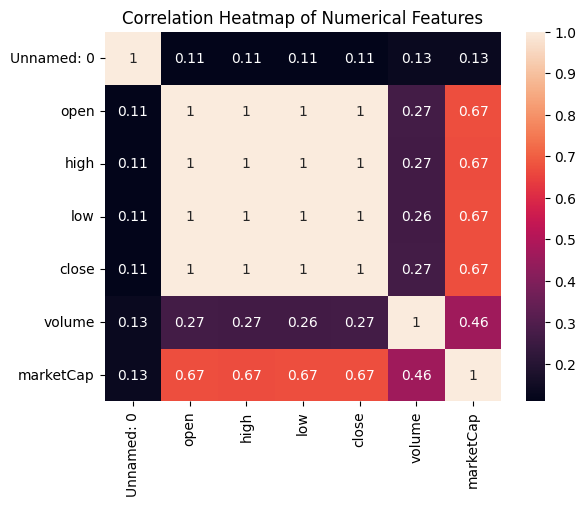

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_data.corr(), annot=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#4. **Feature Engineering**
>* Add new features that represent volatility and liquidity, such as:
>>* Daily return: (close - open) / open
>>* Rolling volatility (e.g., 7-day std of returns)
>>* Liquidity ratio: volume / market_cap

In [10]:
data['daily_return'] = (data['close'] - data['open']) / data['open']
data['rolling_volatility'] = data['daily_return'].rolling(window=7).std()
data['liquidity_ratio'] = data['volume'] / data['marketCap']

In [11]:
pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=0d9596aa319a089ebf6272bbc31840b06f657f070ea0f26e6cbcf5b52ad3163f
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [12]:
import ta

data['bollinger_h'] = ta.volatility.BollingerBands(close=data['close']).bollinger_hband()
data['atr'] = ta.volatility.AverageTrueRange(high=data['high'], low=data['low'], close=data['close']).average_true_range()


#5. **Model Selection**
>* Possible models:
>>* Regression models: Linear Regression, Random Forest Regressor
>>* Time-series models: ARIMA, LSTM (for advanced)
>>* You can start with a Random Forest:

In [22]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data[['daily_return', 'liquidity_ratio', 'atr']]  # add more features as needed
y = data['rolling_volatility'].shift(-1)  # predict next day's volatility

# Combine X and y to drop rows with NaNs and infinities consistently
combined_data = pd.concat([X, y], axis=1).replace([np.inf, -np.inf], np.nan).dropna()

X_cleaned = combined_data[X.columns]
y_cleaned = combined_data[y.name]

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cleaned)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.2, shuffle=False)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
print(X.describe())

       daily_return  liquidity_ratio           atr
count  72869.000000     7.286900e+04  72869.000000
mean       0.004540              inf   1708.715522
std        0.084746              NaN   2074.921718
min       -0.938391     0.000000e+00      0.000000
25%       -0.024891     2.827231e-02    421.971074
50%        0.000000     8.119468e-02    952.326988
75%        0.026196     2.400040e-01   2001.553216
max        7.514706              inf  24620.148735


In [21]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data[['daily_return', 'liquidity_ratio', 'atr']]  # add more features as needed
y = data['rolling_volatility'].shift(-1)  # predict next day's volatility

# Combine X and y to drop rows with NaNs in a consistent manner
combined_data = pd.concat([X, y], axis=1).replace([np.inf, -np.inf], np.nan).dropna()

X_cleaned = combined_data[X.columns]
y_cleaned = combined_data[y.name]

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cleaned)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.2, shuffle=False)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

#6. **Model Evaluation**
>* Use metrics like:
>>* RMSE (Root Mean Squared Error)
>>* MAE (Mean Absolute Error)
>>* R² Score

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 0.11580873690197672
MAE: 0.03153291200065654
R2 Score: -1.7413368273892815


#7. **Model Optimization & Testing**
>* Try GridSearchCV or RandomizedSearchCV for tuning hyperparameters.
>* Test on unseen or recent data.

In [25]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20]
}

grid = GridSearchCV(RandomForestRegressor(), params, cv=3)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 5, 'n_estimators': 200}


#8. **Deployment**
>* Use Streamlit to deploy locally

In [26]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [27]:
# app.py
import streamlit as st

st.title("Crypto Volatility Predictor")

user_input = st.text_input("Enter daily return, liquidity ratio, ATR")
# Add input parsing and prediction here...


2025-08-05 18:52:05.769 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 18:52:06.248 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-05 18:52:06.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 18:52:06.251 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 18:52:06.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 18:52:06.254 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 18:52:06.256 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 18:52:06.262 Thread 'MainThread': mi

In [29]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [30]:
# Create the app.py file
app_code = """
import streamlit as st

st.title("Crypto Volatility Predictor")

user_input = st.text_input("Enter daily return, liquidity ratio, ATR")
# Add input parsing and prediction here...
"""

with open("app.py", "w") as f:
    f.write(app_code)

print("app.py created successfully.")

app.py created successfully.
